# Data Mining & Decision Systems ACW - Medical Records

## Sad Khalid Qayyum (561438)

##### PIP installs and imports

In [1]:
#!pip install seaborn --user
#!pip install sklearn --user
#!pip install scikit-plot --user

In [2]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import copy
import sklearn as skl
import scikitplot as skplt
import numpy as np

##### Data Cleaning

###### Read data and ignore spaces

In [3]:
#Read the data file and treat all the blaqnk spaces as NaN values:
#Make a Deep Copy of the original file:
null_Value = " "
data = pd.read_csv(r'\\adir.hull.ac.uk\home\561\561438\Documentos\Data Mining & Decision Systems\ACW\600092_data.csv', na_values = null_Value)
deepCopy = copy.deepcopy(data)
deepCopy

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,0.602437,218242,A-F,no,no,yes,no,no,78.0,20.0,NoRisk
1,0.602437,159284,TIA,no,no,no,no,no,70.0,60.0,NoRisk
2,0.602437,106066,A-F,no,yes,yes,no,no,95.0,40.0,Risk
3,0.128157,229592,TIA,no,no,yes,no,no,90.0,85.0,Risk
4,0.676862,245829,CVA,no,no,no,no,no,70.0,20.0,NoRisk
...,...,...,...,...,...,...,...,...,...,...,...
1515,0.391440,93406,A-F,no,yes,no,no,no,76.0,60.0,NoRisk
1516,0.253504,121814,A-F,no,no,yes,yes,no,90.0,75.0,Risk
1517,0.620373,101754,TIA,no,no,yes,no,no,75.0,20.0,NoRisk
1518,0.639342,263836,A-F,no,yes,no,no,no,70.0,45.0,NoRisk


###### Find NaN values and count them

In [4]:
#1 Get the specific coumn from the deep copy:
#2 Get all the unique values from a specific column:

df = pd.DataFrame(deepCopy, columns=['Random']) #1
Random_Null_Values = df['Random'].unique() #2

df = pd.DataFrame(deepCopy, columns=['Id']) #1
Id_Null_Values = df['Id'].unique() #2

df = pd.DataFrame(deepCopy, columns=['Indication']) #1
Indication_Null_Values = df['Indication'].unique() #2

df = pd.DataFrame(deepCopy, columns=['Diabetes']) #1
Diabetes_Null_Values = df['Diabetes'].unique() #2

df = pd.DataFrame(deepCopy, columns=['IHD']) #1
IHD_Null_Values = df['IHD'].unique() #2

df = pd.DataFrame(deepCopy, columns=['Hypertension']) #1
Hypertension_Null_Values = df['Hypertension'].unique() #2

df = pd.DataFrame(deepCopy, columns=['Arrhythmia']) #1
Arrhythmia_Null_Values = df['Arrhythmia'].unique() #2

df = pd.DataFrame(deepCopy, columns=['IPSI']) #1
IPSI_Null_Values = df['IPSI'].unique() #2

df = pd.DataFrame(deepCopy, columns=['History']) #1
History_Null_Values = df['History'].unique()

df = pd.DataFrame(deepCopy, columns=['Contra']) #1
Contra_Null_Values = df['Contra'].unique() #2

df = pd.DataFrame(deepCopy, columns=['label']) #1
Label_Null_Values = df['label'].unique() #2

#Print the number of Unique values for each column:

print("\033[4mNumber of Unique values\033[0m"
      "\033[1m\n\nRandom =\033[0m", Random_Null_Values,"\n"
      "\033[1m\nID =\033[0m", Id_Null_Values, "\n"
      "\033[1m\nIndication =\033[0m", Indication_Null_Values,"\n"
      "\033[1m\nDiabetes =\033[0m", Diabetes_Null_Values,"\n"
      "\033[1m\nIHD =\033[0m", IHD_Null_Values, "\n"
      "\033[1m\nHypertension =\033[0m", Hypertension_Null_Values, "\n"
      "\033[1m\nArrhythmia =\033[0m", Arrhythmia_Null_Values, "\n"
      "\033[1m\nIPSI =\033[0m", IPSI_Null_Values, "\n"
      "\033[1m\nHistory =\033[0m", History_Null_Values,"\n"
      "\033[1m\nContra =\033[0m", Contra_Null_Values, "\n",
      "\033[1m\nLabel =\033[0m", Label_Null_Values)

Number of Unique values

Random = [0.60243709 0.12815663 0.6768621  ... 0.62037252 0.63934177 0.6349223 ] 

ID = [218242 159284 106066 ... 101754 263836 254941] 

Indication = ['A-F' 'TIA' 'CVA' 'ASx' 'Asx' nan] 

Diabetes = ['no' 'yes' nan] 

IHD = ['no' 'yes'] 

Hypertension = ['yes' 'no' nan] 

Arrhythmia = ['no' 'yes'] 

IPSI = [78. 70. 95. 90. 75. 81. 80. 76. 82. 85. 68. 50. 73. 99. 71. 65. 74. 98.
 97. 60. 67. 79. 77. 84. 55. 35. 51. nan 69. 72.] 

History = ['no' 'yes' nan] 

Contra = [ 20.  60.  40.  85.  95. 100.  50.  30.  80.  25.  75.  10.  70.  15.
  35.  55.  90.  79.  45.  65.  62.  53.  51.  16.  73.  nan] 
 
Label = ['NoRisk' 'Risk' 'Unknown' nan]


In [5]:
#Count the amount of NaN values for each column and print the number of NaN values for each column

Count_NaN_Records = deepCopy.isna().sum()
print("\033[4mNumber of NaN values\033[0m\n")
print(Count_NaN_Records)

Number of NaN values

Random          0
Id              0
Indication      3
Diabetes        2
IHD             0
Hypertension    3
Arrhythmia      0
History         2
IPSI            4
Contra          1
label           3
dtype: int64


###### Renaming and fixing spelling mistakes

In [6]:
#Rewrite misspelt acronyms from Indication column:

deepCopy['Indication'] = deepCopy['Indication'].replace('ASx', 'ASX')
deepCopy['Indication'] = deepCopy['Indication'].replace('Asx', 'ASX')
##deepCopy['label'] = deepCopy['label'].fillna('BlahBlahBlah', inplace=False)

df = pd.DataFrame(deepCopy, columns=['Indication'])
Indication_Values = df['Indication'].unique()

Indication_Values

array(['A-F', 'TIA', 'CVA', 'ASX', nan], dtype=object)

In [7]:
#Replace Unknown fields into NaNs in the end, the are the same thing:

deepCopy['label'] = deepCopy['label'].replace('Unknown', np.nan)
#deepCopy['label'] = deepCopy['label'].fillna('BlahBlahBlah', inplace=False)

df = pd.DataFrame(deepCopy, columns=['label'])
Label_Null_Values = df['label'].unique()
Label_Null_Values

array(['NoRisk', 'Risk', nan], dtype=object)

In [8]:
#Display allt he rows that contain a NaN value and highlight all the NaNs in red:
df = pd.DataFrame(deepCopy)
find_Nulls = df[df.isna().any(axis=1)]
find_Nulls.style.applymap(lambda x: "background: #ff4747" if pd.isnull(x) else "background: #7aff81")
##df.style.highlight_null(null_color='red')

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
201,0.38879,240232,CVA,yes,no,nan,yes,no,95,90,Risk
337,0.617072,260770,CVA,no,yes,no,no,nan,85,50,NoRisk
442,0.648122,261060,nan,no,yes,yes,no,no,70,40,NoRisk
447,0.681744,224257,CVA,nan,yes,yes,yes,no,90,100,Risk
453,0.518558,254469,ASX,no,no,yes,no,no,70,nan,NoRisk
475,0.298074,173791,ASX,no,yes,yes,no,no,70,55,nan
514,0.39213,210861,A-F,nan,no,yes,no,no,80,40,NoRisk
523,0.46017,283846,CVA,no,no,yes,yes,no,95,100,nan
590,0.70795,289096,A-F,no,no,nan,no,no,78,30,NoRisk
620,0.283872,227779,A-F,no,no,no,no,no,nan,100,Risk


In [9]:
#Count how many null values there are in total
Current_NaN_Records = deepCopy.isna().sum().sum()
Current_NaN_Records

20

In [10]:
All_Records = deepCopy.shape[0]
All_Records

1520

In [11]:
print("Total amount of valid records =", (All_Records - Current_NaN_Records))

Total amount of valid records = 1500


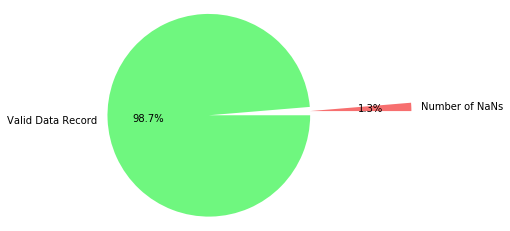

In [12]:
#Amount of NaNs compared to the amountof Valid Records represented in a pie chart

labels = "Number of NaNs", "Valid Data Record"
sizes = [Current_NaN_Records, (All_Records - Current_NaN_Records)]
colors = ['#f76f6f', '#6ff77f']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=360, colors = colors, explode=(1, 0))
plt.axis('Equal')

plt.show()

In [13]:
#Check if the values in the Random column are unique:

Random_Unique_Check = pd.Series(df['Random']).nunique()==len(pd.Series(df['Random']))
Random_Duplicate_Count = deepCopy["Random"].duplicated().sum()
print('Are there any duplicates?', Random_Unique_Check, '\nHow many duplicates are in Random?', Random_Duplicate_Count)

Are there any duplicates? False 
How many duplicates are in Random? 298


In [14]:
#Check if all values in the Random column are not negative
Random_Check_For_0 = (df['Random'] > 0).all()

Random_Check_For_0

True

In [15]:
#1 = Count how many values there are in Random, 2 = Count how many duplicates there are, 3 = Calculate and print how many uniques threre are:
Random_Amount_Count = deepCopy['Random'].count().sum() #1
Random_Duplicate_Count =  Random_Duplicate_Count.sum() #2

print("There are ", Random_Amount_Count - Random_Duplicate_Count, "Unique values in 'Random'") #3


There are  1222 Unique values in 'Random'


In [16]:
Random_Unique_Check = pd.Series(df['Id']).nunique()==len(pd.Series(df['Id']))
Random_Unique_Check

True

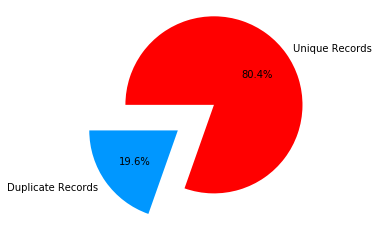

In [17]:
Duplicate_Percentage = ((Random_Duplicate_Count / Random_Amount_Count)*100)
Unique_Percentage = (((Random_Amount_Count - Random_Duplicate_Count) /Random_Amount_Count)*100)

labels = "Duplicate Records", "Unique Records"
sizes = [Duplicate_Percentage, Unique_Percentage]
colors = ['#0097FF', '#FF0000']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=180, colors = colors, explode=(0.5, 0))
plt.axis('Equal')

plt.show()

In [18]:
#1 Renaming "Label" column to "Risk" since the column title does not relate to the content of the column
#2 Print only the "Risk" column to verify the change
deepCopy.rename(columns = {'label' : 'Risk'}, inplace = True) #1
pd.DataFrame(deepCopy, columns = ['Risk']) #2


,Risk
0,NoRisk
1,NoRisk
2,Risk
3,Risk
4,NoRisk
...,...
1515,NoRisk
1516,Risk
1517,NoRisk
1518,NoRisk


In [19]:
#Drop all the records that have a NaN

deepCopy = deepCopy.dropna()
deepCopy

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,Risk
0,0.602437,218242,A-F,no,no,yes,no,no,78.0,20.0,NoRisk
1,0.602437,159284,TIA,no,no,no,no,no,70.0,60.0,NoRisk
2,0.602437,106066,A-F,no,yes,yes,no,no,95.0,40.0,Risk
3,0.128157,229592,TIA,no,no,yes,no,no,90.0,85.0,Risk
4,0.676862,245829,CVA,no,no,no,no,no,70.0,20.0,NoRisk
...,...,...,...,...,...,...,...,...,...,...,...
1515,0.391440,93406,A-F,no,yes,no,no,no,76.0,60.0,NoRisk
1516,0.253504,121814,A-F,no,no,yes,yes,no,90.0,75.0,Risk
1517,0.620373,101754,TIA,no,no,yes,no,no,75.0,20.0,NoRisk
1518,0.639342,263836,A-F,no,yes,no,no,no,70.0,45.0,NoRisk


In [20]:
print('\033[4mCurrent amount of NaNs after dropping them\033[0m')
Count_NaN_Records = deepCopy.isna().sum()
Count_NaN_Records

Current amount of NaNs after dropping them


Random          0
Id              0
Indication      0
Diabetes        0
IHD             0
Hypertension    0
Arrhythmia      0
History         0
IPSI            0
Contra          0
Risk            0
dtype: int64

In [21]:
deepCopy = deepCopy.drop(columns=['Random'])
deepCopy

,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,Risk
0,218242,A-F,no,no,yes,no,no,78.0,20.0,NoRisk
1,159284,TIA,no,no,no,no,no,70.0,60.0,NoRisk
2,106066,A-F,no,yes,yes,no,no,95.0,40.0,Risk
3,229592,TIA,no,no,yes,no,no,90.0,85.0,Risk
4,245829,CVA,no,no,no,no,no,70.0,20.0,NoRisk
...,...,...,...,...,...,...,...,...,...,...
1515,93406,A-F,no,yes,no,no,no,76.0,60.0,NoRisk
1516,121814,A-F,no,no,yes,yes,no,90.0,75.0,Risk
1517,101754,TIA,no,no,yes,no,no,75.0,20.0,NoRisk
1518,263836,A-F,no,yes,no,no,no,70.0,45.0,NoRisk


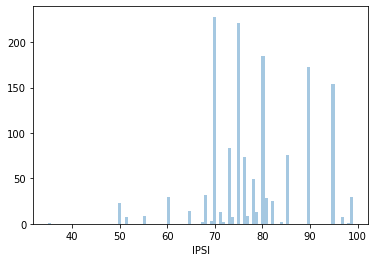

In [22]:
sb.distplot(deepCopy['IPSI'], kde=False, bins=100)
plt.show()

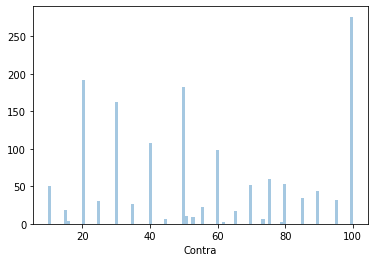

In [23]:
sb.distplot(deepCopy['Contra'], kde=False, bins=100)
plt.show()

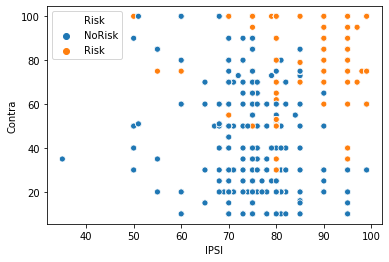

In [24]:
sb.scatterplot(x= 'IPSI', y= 'Contra', data= deepCopy, hue = 'Risk')
plt.show()

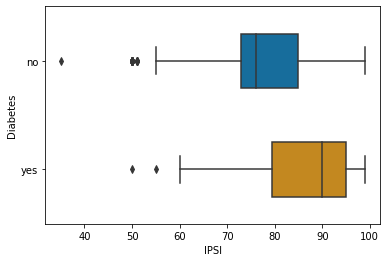

In [25]:
sb.boxplot(y='Diabetes', x='IPSI', data=deepCopy, width=0.5, palette="colorblind")
plt.show()

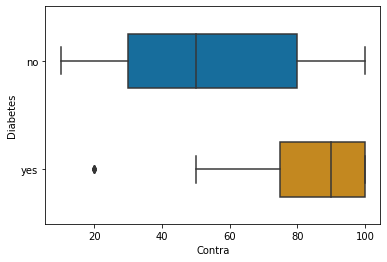

In [26]:
sb.boxplot(y='Diabetes', x='Contra', data=deepCopy, width=0.5, palette="colorblind")
plt.show()

### help


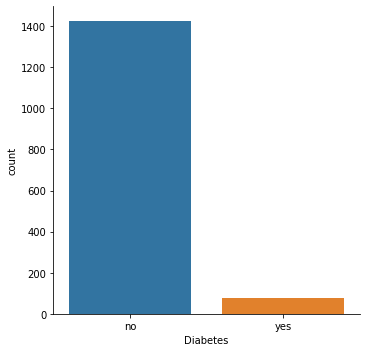

In [27]:
sb.catplot(x='Diabetes', data=deepCopy, kind='count')

In [28]:
# 1 Split the "Risk" row to binary entries (Risk_NoRisk = 0, 1, 1, 0)
# 2 Drop the Risk Column
# 3 Merger the Binary sliptted columns into the DeepCopy

Risk_BinarySplit = pd.get_dummies(deepCopy['Risk'], prefix='Risk') # 1
deepCopy = deepCopy.drop(columns = "Risk") # 2
deepCopy = deepCopy.join(Risk_BinarySplit) # 3

deepCopy

,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,Risk_NoRisk,Risk_Risk
0,218242,A-F,no,no,yes,no,no,78.0,20.0,1,0
1,159284,TIA,no,no,no,no,no,70.0,60.0,1,0
2,106066,A-F,no,yes,yes,no,no,95.0,40.0,0,1
3,229592,TIA,no,no,yes,no,no,90.0,85.0,0,1
4,245829,CVA,no,no,no,no,no,70.0,20.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1515,93406,A-F,no,yes,no,no,no,76.0,60.0,1,0
1516,121814,A-F,no,no,yes,yes,no,90.0,75.0,0,1
1517,101754,TIA,no,no,yes,no,no,75.0,20.0,1,0
1518,263836,A-F,no,yes,no,no,no,70.0,45.0,1,0


In [29]:
tips = pd.DataFrame(deepCopy, columns=deepCopy)
sb.heatmap(deepCopy = tips.corr())

TypeError: heatmap() missing 1 required positional argument: 'data'